In [1]:
%load_ext autoreload
%autoreload 2
import pysegmentation
from pylab import *

In [2]:
cd notebook

/home/jarbona/pysegmentation/notebook


In [3]:
from pysegmentation.load_data import load_data_ml

name ="../../simuNano/meg3_mock/test_learning_test"
X,y = load_data_ml(root=name,bin_size=200,read_size=256)

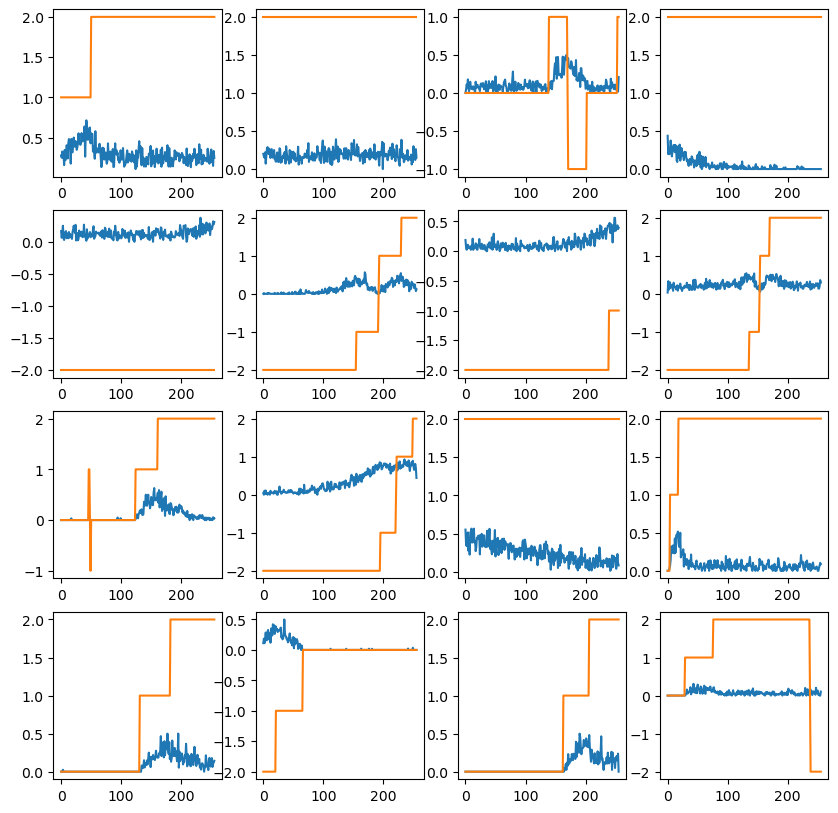

In [4]:
f=figure(figsize=(10,10))
for i in range(16):
    f.add_subplot(4,4,i+1)
    plot(X[i])
    plot(y[i])

In [5]:
from pysegmentation.models_light import LitUnet
from pysegmentation.datasets import Dataset1dto1d


md = Dataset1dto1d(X,y)
model = LitUnet(16,kernel_size=5)

/home/jarbona/miniconda3/envs/pysegmentation/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import torch.utils.data as data
import torch
train_set_size = int(len(md) * 0.8)
valid_set_size = len(md) - train_set_size

# split the train set into two
seed = torch.Generator().manual_seed(42)
train_set, valid_set = data.random_split(md, [train_set_size, valid_set_size], generator=seed)

In [7]:
from torch import utils
train_loader = utils.data.DataLoader(train_set,batch_size=8)
val_loader = utils.data.DataLoader(valid_set,batch_size=8)

In [8]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl

trainer = pl.Trainer(limit_train_batches=200, max_epochs=100,callbacks=[EarlyStopping(monitor="validation_loss", mode="min",patience=10)])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [9]:
trainer.fit(model=model, train_dataloaders=train_loader,val_dataloaders=val_loader)


  | Name  | Type    | Params
----------------------------------
0 | model | UNET_1D | 277 K 
----------------------------------
277 K     Trainable params
0         Non-trainable params
277 K     Total params
1.109     Total estimated model params size (MB)


/home/jarbona/miniconda3/envs/pysegmentation/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/jarbona/miniconda3/envs/pysegmentation/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/jarbona/miniconda3/envs/pysegmentation/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of train

Epoch 0:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7/9 [00:00<00:00, 36.87it/s, loss=1.59, v_num=14]
Validation: 0it [00:00, ?it/s]
Epoch 1:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7/9 [00:00<00:00, 41.53it/s, loss=1.57, v_num=14]
Validation: 0it [00:00, ?it/s]
Epoch 2:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7/9 [00:00<00:00, 47.10it/s, loss=1.53, v_num=14]
Validation: 0it [00:00, ?it/s]
Epoch 3:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7/9 [00:00<00:00, 42.14it/s, loss=1.48, v_num=14]
Validation: 0it [00:00, ?it/s]
Epoch 4:  78%|██████████████████████████████████████████████

In [13]:
#Load from pretrained
#model = LitUnet.load_from_checkpoint("../first_test/lightning_logs/version_2/checkpoints/epoch=65-step=5544.ckpt")

In [14]:
pred=[]
Xs = []
for X, y in val_loader:
    pred.append(torch.argmax(model.model(X),axis=1))
    Xs.append(X)
pred=torch.concat(pred)
Xs=torch.concat(Xs)

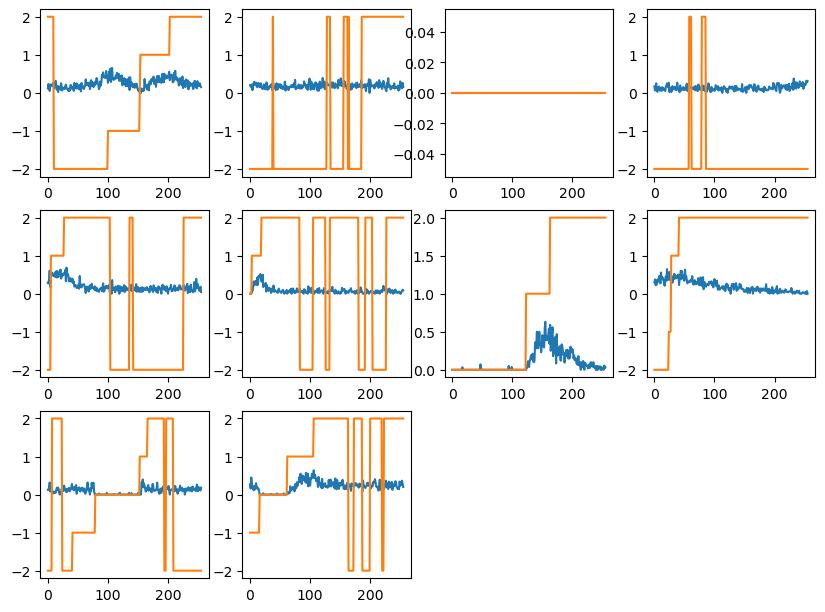

In [15]:
f=figure(figsize=(10,10))
for i in range(10):
    f.add_subplot(4,4,i+1)
    plot(Xs[i][0])
    plot(pred[i]-2)